In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

In [136]:
conda install -c conda-forge cufflinks-py 

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\m_pya\anaconda3

  added / updated specs:
    - cufflinks-py


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    chart-studio-1.1.0         |     pyh9f0ad1d_0          51 KB  conda-forge
    colorlover-0.3.0           |             py_0          12 KB  conda-forge
    conda-4.9.2                |   py38haa244fe_0         3.1 MB  conda-forge
    cufflinks-py-0.17.3        |             py_0           4 KB  conda-forge
    python-cufflinks-0.17.3    |             py_0          59 KB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  chart-studio       conda-forge/noarch::chart-studio



==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda




In [137]:
import cufflinks as cf
cf.go_offline()

## Получение данных

In [3]:
training = pd.read_csv('train.csv')
testing = pd.read_csv('test.csv')

In [259]:
testing = pd.read_csv('test.csv')

In [10]:
training.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
training[training['Pclass']==1].head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


## Анализ данных

In [4]:
training.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"van Melkebeke, Mr. Philemon",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [11]:
training.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [6]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [182]:
pd.isnull(training).sum().sort_values(ascending = False)

Cabin          687
Age            136
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

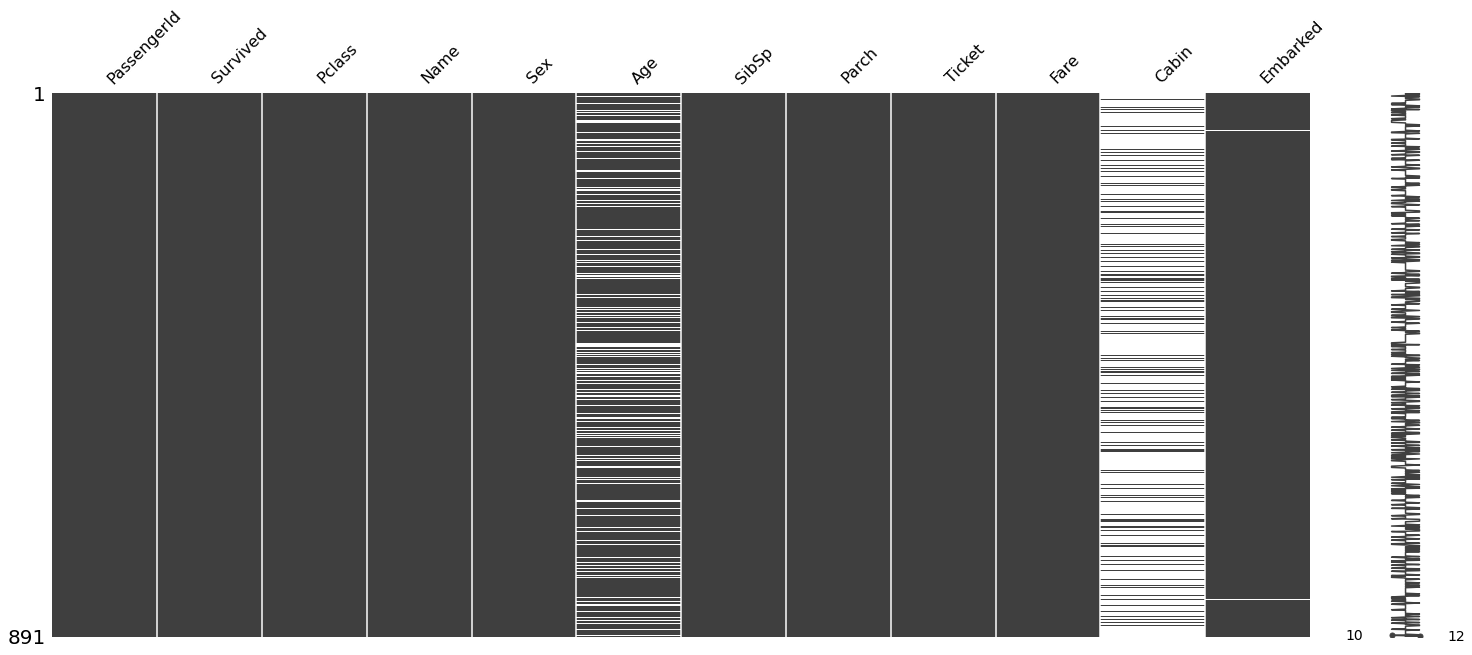

In [80]:
missingno.matrix(training)

In [81]:
training[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [82]:
training[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [95]:
group_class = training[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean()
group_class['Survived'] = round(group_class['Survived'], 2)
group_class

,Pclass,Survived
0,1,0.63
1,2,0.47
2,3,0.24


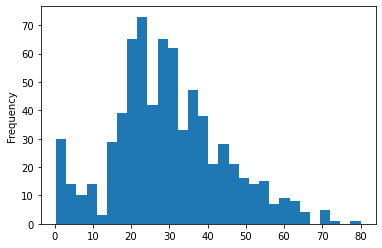

In [9]:
training['Age'].plot.hist(bins=30)

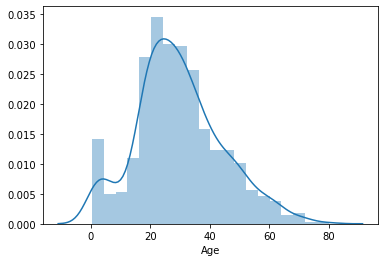

In [105]:
sns.distplot(training['Age'])

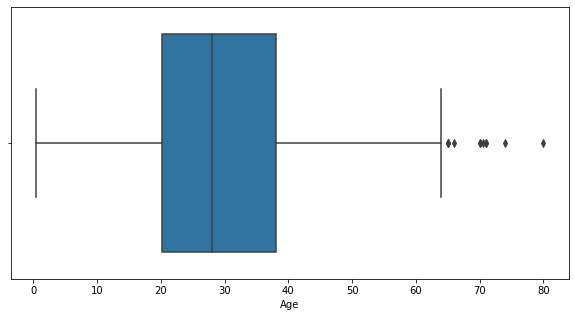

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(training['Age'])

In [19]:
#дисперсия для ГС ddof=0 (число степеней свободы), для выборки = 1
np.var(training['Age'], ddof=0)

210.7235797536662

In [21]:
#стандартное отклонение
np.std(training['Age'], ddof=0)

14.516321150817317

In [63]:
sample1.median()

28.591480446927374

In [64]:
sample2.median()

30.81297752808989

In [68]:
training.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.047253,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.072996,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331117,0.083081,0.018443,-0.549500
Age,0.047253,-0.072996,-0.331117,1.000000,-0.234413,-0.179118,0.091623
SibSp,-0.057527,-0.035322,0.083081,-0.234413,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179118,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091623,0.159651,0.216225,1.000000


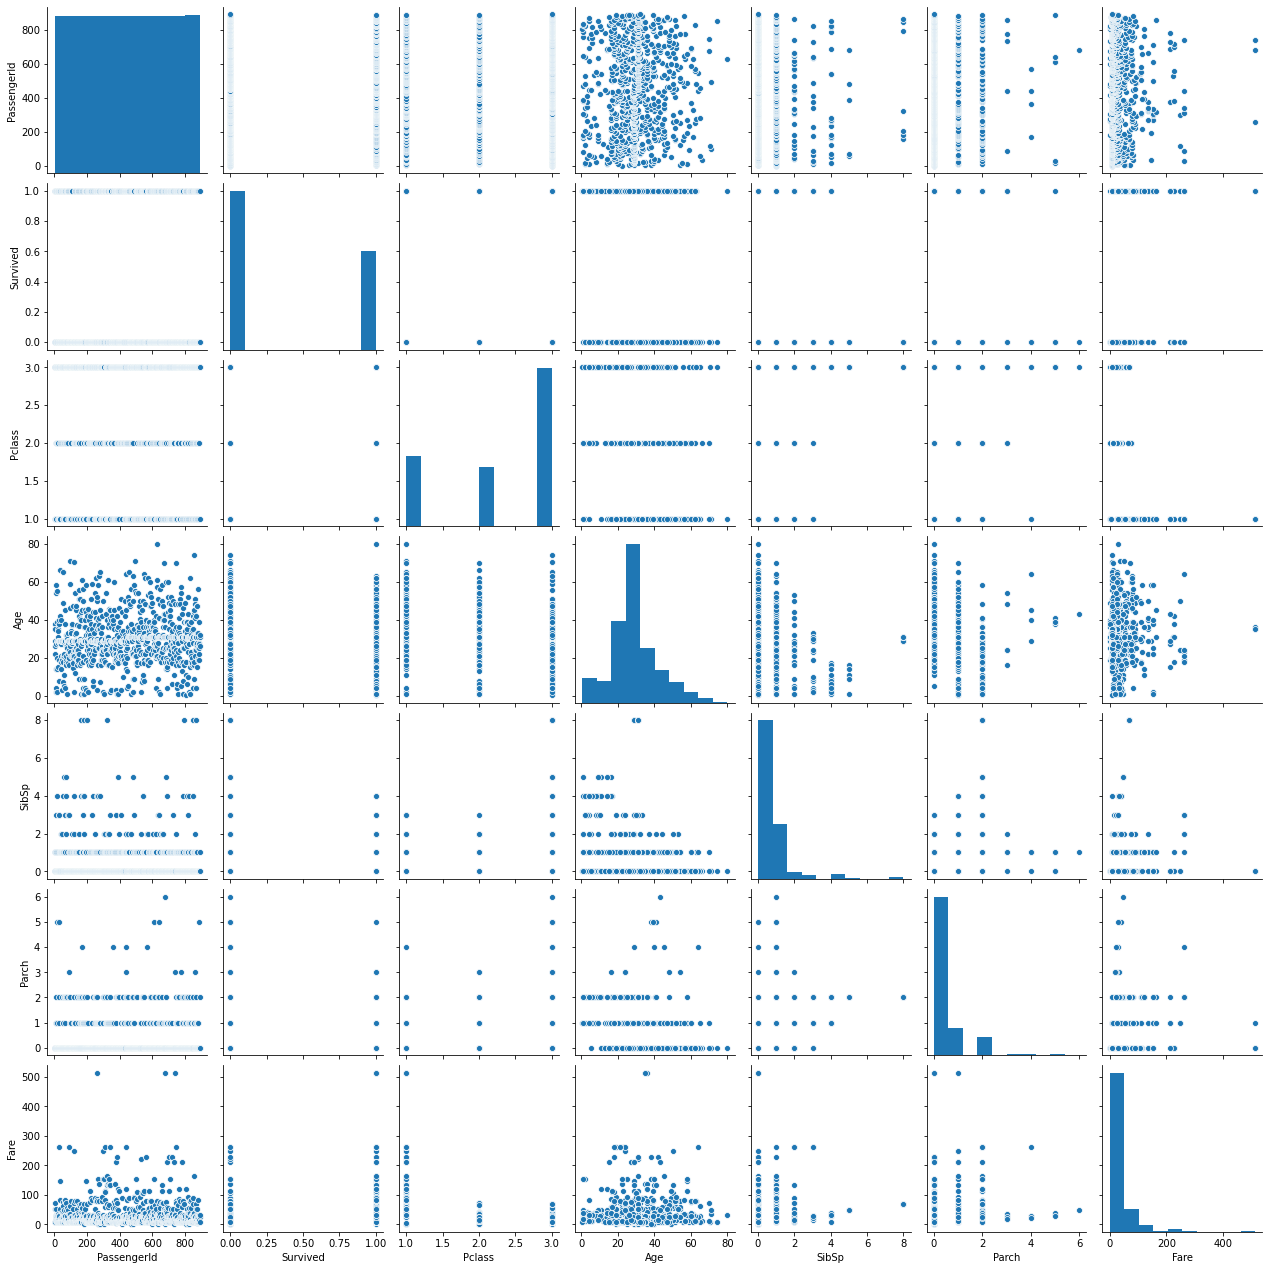

In [69]:
sns.pairplot(training);

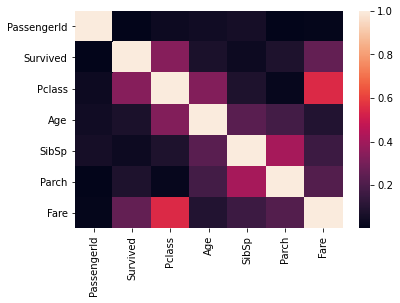

In [71]:
sns.heatmap(abs(training.corr()))

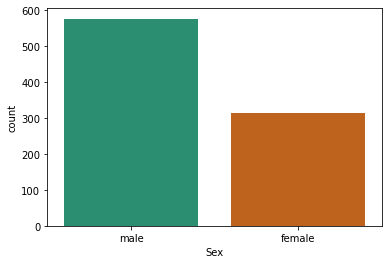

In [99]:
sns.countplot(x='Sex', data = training, palette='Dark2')

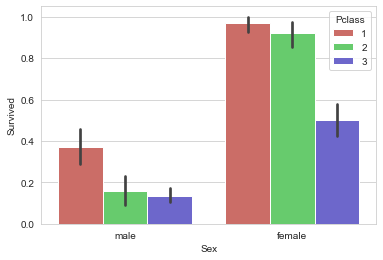

In [125]:
sns.barplot(x='Sex', y='Survived', data=training, hue='Pclass', palette='hls')

Text(0.5, 1.0, 'Probability by passanger class')

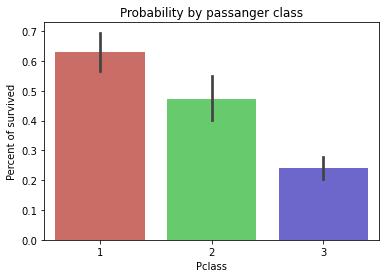

In [103]:
sns.barplot(x='Pclass', y='Survived', data = training, palette='hls')
plt.ylabel('Percent of survived')
plt.title('Probability by passanger class')

Text(0.5, 1.0, 'Вероятность выживания в зависимости от класса и пола')

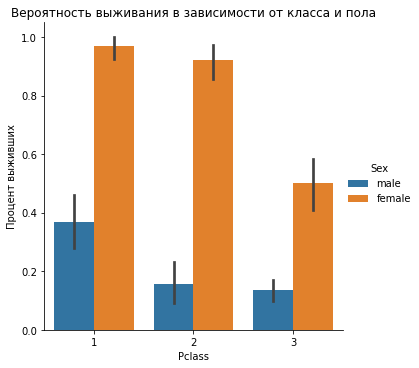

In [111]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=training, kind='bar')
plt.ylabel('Процент выживших')
plt.title('Вероятность выживания в зависимости от класса и пола')

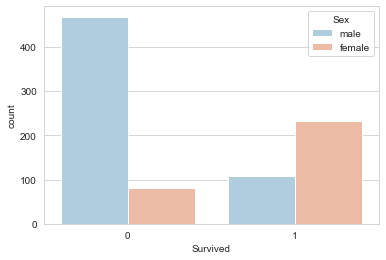

In [114]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=training, palette='RdBu_r')

Text(0, 0.5, 'Количество')

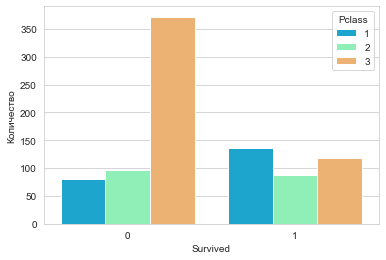

In [118]:
sns.countplot(x='Survived', hue='Pclass', data=training, palette='rainbow')
plt.ylabel('Количество')

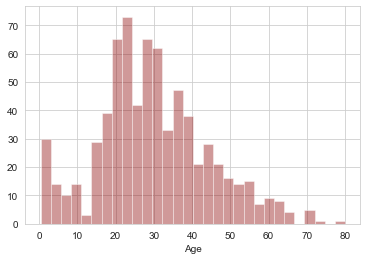

In [129]:
sns.distplot(training['Age'].dropna(), bins=30, kde=False, color='darkred')

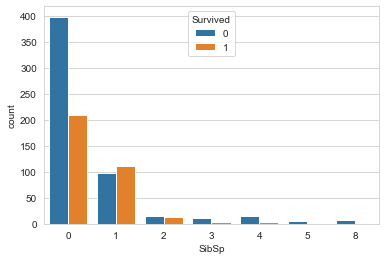

In [131]:
sns.countplot(x='SibSp', hue='Survived', data=training)

In [132]:
print('Процент выживших женщин: ', round(training['Survived'][training['Sex']=='female'].value_counts(normalize=True)[1],2)*100, ' %')
print('Процент выживших мужчин: ', round(training['Survived'][training['Sex']=='male'].value_counts(normalize=True)[1],2)*100, ' %')


Процент выживших женщин:  74.0  %
Процент выживших мужчин:  19.0  %


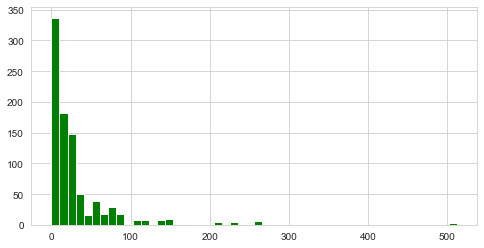

In [135]:
training['Fare'].hist(bins=50, color='green', figsize=(8, 4))

In [142]:
# Plotly
training['Fare'].iplot(kind='hist')

## Заполнение данных

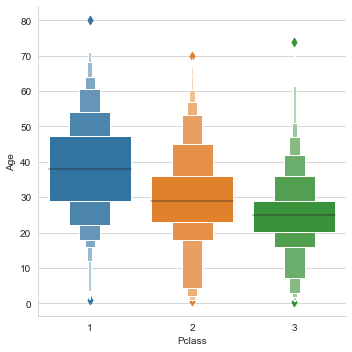

In [193]:
sns.catplot(x='Pclass', y='Age', data=training, kind='boxen')

In [190]:
def av_age(data):
    ### Заполнение столбца 'Age'  средними значениями по классам 
    for i in range(1,4):
        data['Age'][data['Pclass']==i] = data['Age'][data['Pclass']==i].fillna(int(np.mean(data['Age'][data['Pclass']==i])))

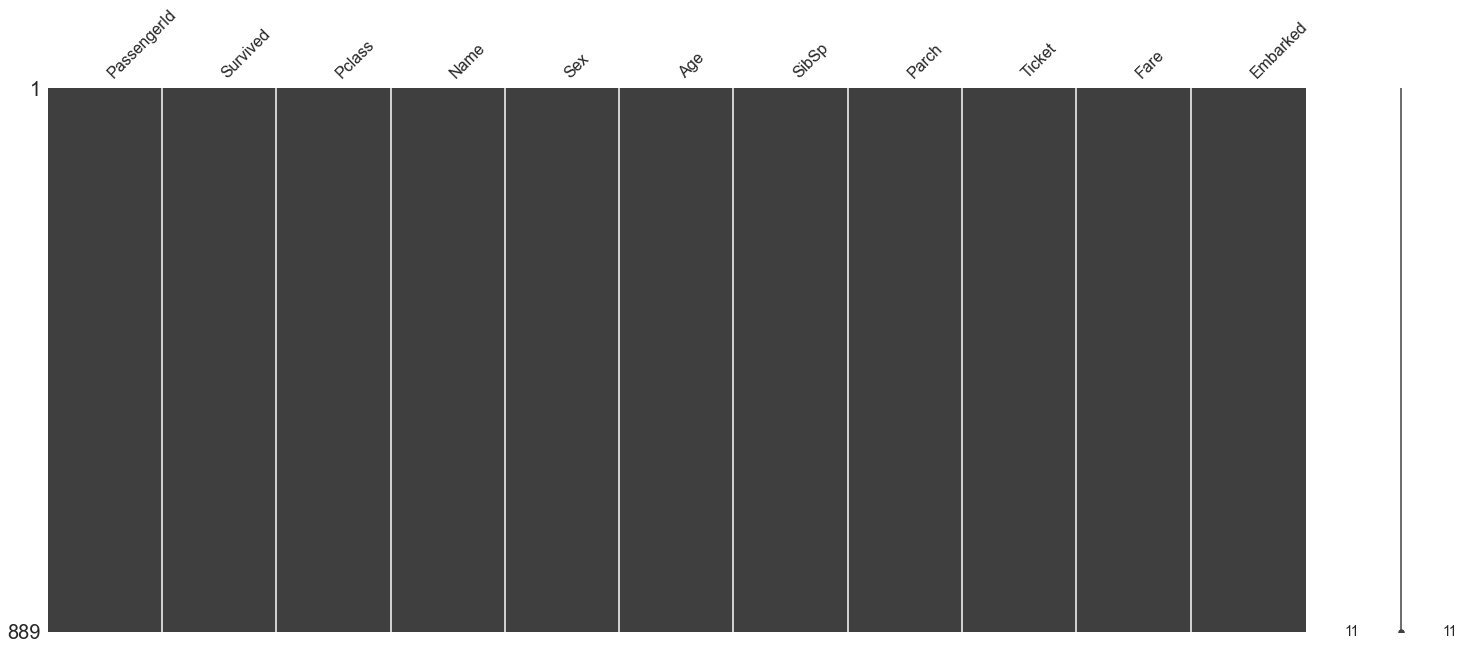

In [266]:
missingno.matrix(training)

Дропаем колонку 'Cabin' и наблюдения, значения которых в столбце 'Embarked' пропущено

## Конвертация категориальных признаки в числовые

In [202]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


## Итог

In [489]:
av_age(training)

training.drop(columns='Cabin', inplace=True)
training.dropna(inplace=True)

sex = pd.get_dummies(training['Sex'], drop_first=True)
embar = pd.get_dummies(training['Embarked'], drop_first=True)

training.drop(columns=['Name', 'Ticket', 'Embarked', 'Sex'], axis=1, inplace=True)

training = pd.concat([training, sex, embar], axis=1)
training.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Масштабирование признаков

In [340]:
def scaling(data_col):
    new_col = data_col.apply(lambda x: (np.max(data_col)-x)/(np.max(data_col)-np.min(data_col)))
    return new_col

In [490]:
training['nAge'] = scaling(training.Age)
training.drop('Age', axis=1, inplace=True)

In [491]:
training['nFare'] = scaling(training.Fare)
training.drop('Fare', axis=1, inplace=True)

In [492]:
training

,PassengerId,Survived,Pclass,SibSp,Parch,male,Q,S,nAge,nFare
0,1,0,3,1,0,1,0,1,0.728826,0.985849
1,2,1,1,1,0,0,0,0,0.527771,0.860864
2,3,1,3,0,0,0,0,1,0.678562,0.984531
3,4,1,1,1,0,0,0,1,0.565469,0.896356
4,5,0,3,0,0,1,0,1,0.565469,0.984287
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,1,0,1,0.665996,0.974626
887,888,1,1,0,0,0,0,1,0.766524,0.941444
888,889,0,3,1,2,0,0,1,0.691128,0.954229
889,890,1,1,0,0,1,0,0,0.678562,0.941444


## Обучение и предсказание

In [430]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [437]:
logist = LogisticRegression(random_state=0, C=10, solver='liblinear')

In [493]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [484]:
parametrs = {'criterion' : ['entropy', 'gini'],
            'n_estimators': range(50, 101, 10),
            'max_depth': range(3, 10, 2),
            'min_samples_split': range(2, 6, 1),
            'min_samples_leaf': range(1, 5, 1)}

In [494]:
clf = RandomForestClassifier(n_jobs=-1, random_state=0)

In [495]:
grid_search_clf = GridSearchCV(clf, parametrs, cv=3)

In [496]:
grid_search_clf.fit(xtrain, ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(3, 10, 2),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 6),
                         'n_estimators': range(50, 101, 10)})

In [439]:
cross_logist = cross_val_score(logist, xtrain, ytrain, cv=5)

In [440]:
cross_logist

array([0.81118881, 0.81690141, 0.74647887, 0.80985915, 0.8028169 ])

In [442]:
logist.fit(xtrain, ytrain)

LogisticRegression(C=10, random_state=0, solver='liblinear')

In [424]:
x = training.drop('Survived', axis =1 )
y = training.Survived

In [497]:
grid_search_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 70}

In [498]:
best_clf = grid_search_clf.best_estimator_

In [499]:
predictions = best_clf.predict(xtest)

In [222]:
from sklearn.metrics import classification_report, accuracy_score

In [500]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       115
           1       0.78      0.67      0.72        63

    accuracy                           0.81       178
   macro avg       0.80      0.78      0.79       178
weighted avg       0.81      0.81      0.81       178



In [501]:
accuracy_score(ytest, predictions)

0.8146067415730337

### statsmodels

In [456]:
import statsmodels.api as sm

In [474]:
from sklearn.preprocessing import StandardScaler

In [475]:
scaler = StandardScaler()

In [478]:
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [479]:
model = sm.Logit(ytrain, xtrain)

In [480]:
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.472165
         Iterations 6


In [481]:
result.params

x1   -0.034125
x2   -0.824034
x3   -0.386790
x4   -0.126381
x5   -1.338682
x6   -0.019180
x7   -0.180497
x8    0.509517
x9   -0.220827
dtype: float64

In [482]:
predictions_stats = model.predict(xtest)

ValueError: shapes (711,9) and (178,9) not aligned: 9 (dim 1) != 178 (dim 0)

## Работа с тестовыми данными 

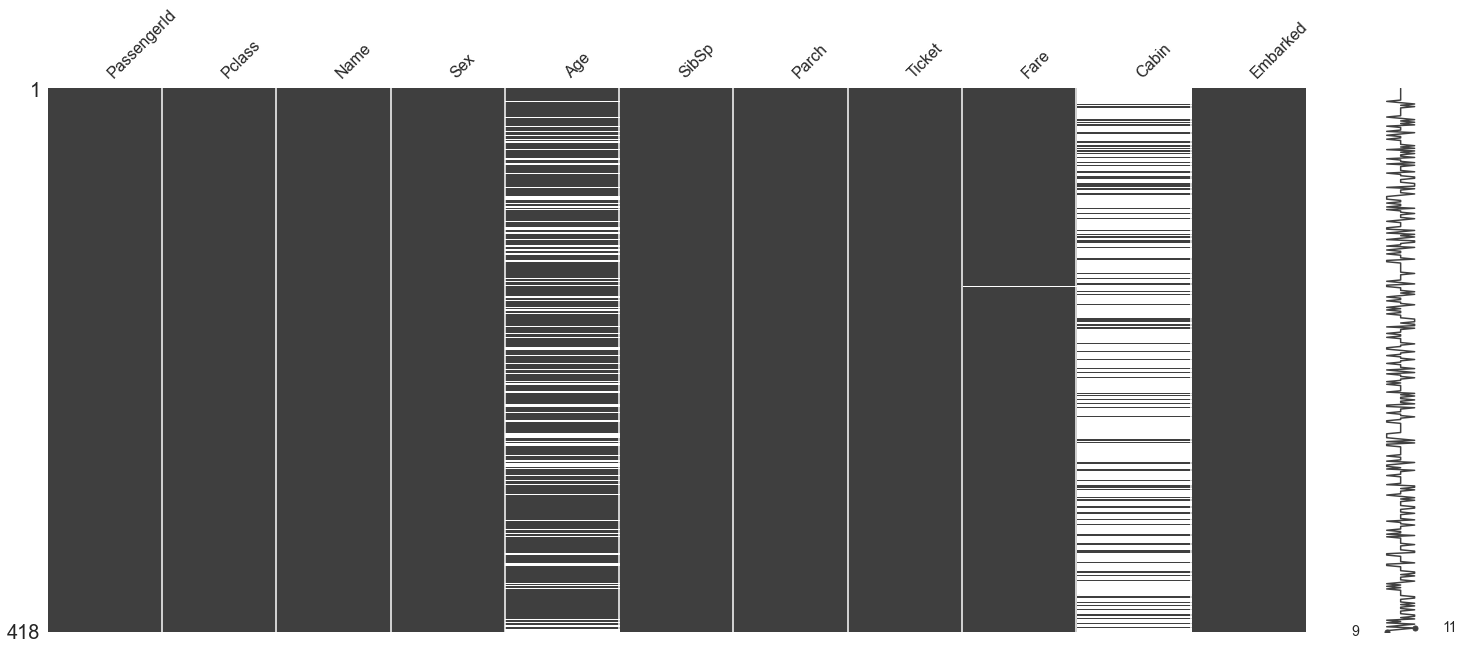

In [229]:
missingno.matrix(testing)

In [230]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [502]:
av_age(testing)
testing['Fare'].fillna(np.mean(testing['Fare']), inplace=True)

answers1 = pd.DataFrame(testing.PassengerId)

testing.drop(columns='Cabin', inplace=True)

sex = pd.get_dummies(testing['Sex'], drop_first=True)
embar = pd.get_dummies(testing['Embarked'], drop_first=True)

testing.drop(columns=['Name', 'Ticket', 'Embarked', 'Sex'], axis=1, inplace=True)
testing = pd.concat([testing, sex, embar], axis=1)

testing['nAge'] = scaling(testing.Age)
testing.drop('Age', axis=1, inplace=True)

testing['nFare'] = scaling(testing.Fare)
testing.drop('Fare', axis=1, inplace=True)

predictions1 = best_clf.predict(testing)

In [503]:
answers1['Survived'] = pd.Series(predictions1)
answers1.to_csv('answers6.csv', index=False)

## Проверка гипотез

Нулевая гипотеза: распределение нормальное

In [25]:
import scipy

In [32]:
stat, p = scipy.stats.shapiro(training['Age'])

In [33]:
# p<alpha - отклоняем гипотезу
alpha = 0.05
p<alpha

False

Распределение нормальное

In [58]:
half = len(training['Age'])/2
sample1 = training.loc[:half, 'Age']
sample2 = training.loc[half:, 'Age']
sample1.fillna(np.mean(sample1), inplace=True)
sample2.fillna(np.mean(sample2), inplace=True)

Нулевая гипотеза: средние равны

In [59]:
scipy.stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=-2.556081135864081, pvalue=0.010751101050874437)

Отвергаем 0 гипотезу

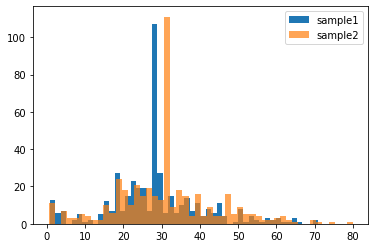

In [60]:
plt.hist(sample1, bins=50, label='sample1')
plt.hist(sample2, bins=50, label='sample2', alpha=0.7)
plt.legend(loc= 'upper right')
plt.show()